# TrueSkill のいろいろテスト

In [1]:
import trueskill
from trueskill import TrueSkill, rate_1vs1
import matplotlib.pyplot as plt
import random

In [2]:
def matches(match=100, bob_win=0.24):
    alice = TrueSkill(mu=1500, sigma=150, beta=75, tau=1.5, draw_probability=0.0)
    bob = TrueSkill(mu=1500, sigma=150, beta=75, tau=1.5, draw_probability=0.0)
    for i in range(match):
        if random.random() < bob_win:
            b, a = rate_1vs1(bob, alice)
        else:
            a, b = rate_1vs1(alice, bob)
        alice = TrueSkill(mu=a.mu, sigma=a.sigma, beta=75, tau=1.5, draw_probability=0.0)
        bob = TrueSkill(mu=b.mu, sigma=b.sigma, beta=75, tau=1.5, draw_probability=0.0)
    return [alice, bob]
def skill(player):
    return player.mu - 3 * player.sigma
def diff_skill(players):
    return skill(players[0]) - skill(players[1])
list_diff_skill = [diff_skill(matches()) for j in range(100)]

TypeError: can't multiply sequence by non-int of type 'float'

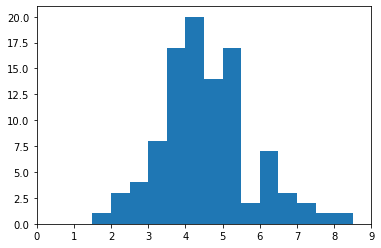

In [3]:
fig = plt.figure()
ax  = fig.add_subplot(1,1,1)
ax.hist(list_diff_skill, bins=18, range=(0,9))
ax.set_xlim(0,9)
ax.set_yticks(0.1*[0,40,80,120,160,200,250])

# save figure
plt.tight_layout()
# plt.savefig('figure/hist_diff_skill_1000.pdf', bbox_inches='tight')

In [4]:
SIGMA_INIT = 15
BETA = 7.5
TAU = 0.15

In [5]:
def matches_with_beginners(match=100, bob_win=0.24):
    alice = TrueSkill(mu=1500, sigma=SIGMA_INIT, beta=BETA, tau=TAU, draw_probability=0.0)
    bob = TrueSkill(mu=1500, sigma=SIGMA_INIT, beta=BETA, tau=TAU, draw_probability=0.0)
    for i in range(match):
        if random.random() < bob_win:
            _, a = rate_1vs1(bob, alice)
        else:
            a, _ = rate_1vs1(alice, bob)
        alice = TrueSkill(mu=a.mu, sigma=a.sigma, beta=BETA, tau=TAU, draw_probability=0.0)
        bob = TrueSkill(mu=1500, sigma=SIGMA_INIT, beta=BETA, tau=TAU, draw_probability=0.0)
    return alice

In [6]:
def matches_with_self(match=100, bob_win=0.24):
    alice = TrueSkill(mu=1500, sigma=SIGMA_INIT, beta=BETA, tau=TAU, draw_probability=0.0)
    bob = TrueSkill(mu=1500, sigma=SIGMA_INIT, beta=BETA, tau=TAU, draw_probability=0.0)
    for i in range(match):
        # print(alice)
        # print(bob)
        # print(rate_1vs1(alice, bob))
        if random.random() < bob_win:
            _, a = rate_1vs1(bob, alice)
        else:
            a, _ = rate_1vs1(alice, bob)
        alice = TrueSkill(mu=a.mu, sigma=a.sigma, beta=BETA, tau=TAU, draw_probability=0.0)
        bob = alice
    return alice

In [7]:
SIGMA_INIT = 15
BETA = 7.5
TAU = 0.15
alice = matches_with_beginners(1000, 0.0)
skill(alice)

1536.9625771199524

In [8]:
bob = TrueSkill(mu=1500, sigma=15, beta=7.5, tau=0.15, draw_probability=0.0)
(bob, alice) = rate_1vs1(bob, alice)
print(skill(alice))
print(skill(bob))

1535.5468395125522
1521.6018554339648


In [9]:
SIGMA_INIT = 15
BETA = 7.5
TAU = 0.15
alice = matches_with_self(500, 0.0)
skill(alice)

1605.2927422147934

In [10]:
bob = TrueSkill(mu=1500, sigma=SIGMA_INIT, beta=BETA, tau=TAU, draw_probability=0.0)
(bob, alice) = rate_1vs1(bob, alice)
print(skill(alice))
print(skill(bob))

1605.0211856277817
1578.0683127029372


In [11]:
SIGMA_INIT = 150
BETA = 75
TAU = 1.5
alice = matches_with_self(5, 0.0)
skill(alice)

1627.3736915761056

In [12]:
bob = TrueSkill(mu=1500, sigma=SIGMA_INIT, beta=BETA, tau=TAU, draw_probability=0.0)
(bob, alice) = rate_1vs1(bob, alice)
print(skill(alice))
print(skill(bob))

1590.8176459223164
1597.609053611581
